In [1]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt

from math import sin, cos, exp, pi

C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Functions

In [7]:
# Function for plotting the rectangle
# Input1: x coordinates of the circumference
# Input2: y coordinates of the circumference
# Input3: x coordinates of the inner domain
# Input4: y coordinates of the inner domain

def rect_plot(x_coordinates, y_coordinates, x_filled, y_filled, savefig):

    plt.figure(figsize = (6,6))
    plt.scatter(x_coordinates, y_coordinates, color = 'firebrick', s = 20)
    plt.scatter(x_filled, y_filled, color = 'lightcoral', s = 0.5, alpha = 0.05)

    plt.title('The generated domain with width = ' + str(w) + ', height = ' + str(h), fontsize = 16)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    plt.grid()
    
    if savefig == True:
        plt.savefig('domain.jpg', dpi = 600)
    
    plt.show()

In [3]:
# Function for generating the circumference of the domain
# Input1: the width of the domain
# Input2: the height of the domain
# Input3: the divison point - the relative height of the full rectangle
# Output: list of the following:
#    x coordinates of the circumference
#    y coordinates of the circumference
#    x coordinates of the inner domain
#    y coordinates of the inner domain

def rect_circ2(width, height, devision_point):
    
    # Creating lists to save the coordinates
    x_coord_circ = []
    y_coord_circ = []
    x_filled = []
    y_filled = []

    # Generating the coordinates
    x_lower_upper = list(np.array(range(int(-width/2*100), int(width/2*100)))/100)
    y_lower = [-height/2]*len(x_lower_upper)
    y_upper = [height/2]*len(x_lower_upper)

    y_left_right = list(np.array(range(int(-h/2*100), int(h/2*100)))/100)
    x_left = [-width/2]*len(y_left_right)
    x_right = [width/2]*len(y_left_right)
    
    # Generating the circumference
    x_coord_circ += x_lower_upper + x_left + x_right
    y_coord_circ += y_lower + y_left_right + y_left_right
    
    # Generating the upper parts of the domain
    
    x_temp1 = x_lower_upper[int(len(x_lower_upper)/10*0):int(len(x_lower_upper)/10*2)]
    x_temp3 = x_lower_upper[int(len(x_lower_upper)/10*4):int(len(x_lower_upper)/10*6)]
    x_temp5 = x_lower_upper[int(len(x_lower_upper)/10*8):int(len(x_lower_upper)/10*10)]  
    x_coord_circ += x_temp1 + x_temp3 + x_temp5
    y_coord_circ += [height/2]*len(x_temp1) * 3
    
    # Generating the lower parts of the domain
    x_temp2 = x_lower_upper[int(len(x_lower_upper)/10*2):int(len(x_lower_upper)/10*4)]
    x_temp4 = x_lower_upper[int(len(x_lower_upper)/10*6):int(len(x_lower_upper)/10*8)]
    x_coord_circ += x_temp2 + x_temp4
    y_coord_circ += [y_left_right[int(len(y_left_right)*devision_point)]]*len(x_temp2)*2
    
    # Generating the perpendicular parts of the domain
    y_temp1 = y_left_right[int(len(y_left_right)*devision_point):]
    y_coord_circ += y_temp1*4
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*2)]] * len(y_temp1)
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*4)]] * len(y_temp1)
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*6)]] * len(y_temp1)
    x_coord_circ += [x_lower_upper[int(len(x_lower_upper)/10*8)]] * len(y_temp1) 
    
    # Filling up the lower devision_point of the rectangle
    for i in range(1,int(len(y_left_right) * devision_point)-1):
        #appending the x and y coordinates
        x_filled += x_lower_upper[1:-1]
        y_filled += [y_left_right[i]]*len(x_lower_upper[1:-1])
    
    # Filling up the rest of the domain
    for i in range(int(len(y_left_right) * devision_point), len(y_left_right)):        
        temp = x_lower_upper[int(len(x_lower_upper)/10*0)+1:int(len(x_lower_upper)/10*2)-1]      
        x_filled += temp
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*4)+1:int(len(x_lower_upper)/10*6)-1]
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*8)+1:int(len(x_lower_upper)/10*10)-1]
        y_filled += [y_left_right[i]]*len(temp)*3
    
    # Returning the coordinates
    return [x_coord_circ, y_coord_circ, x_filled, y_filled]

## Generating the domain

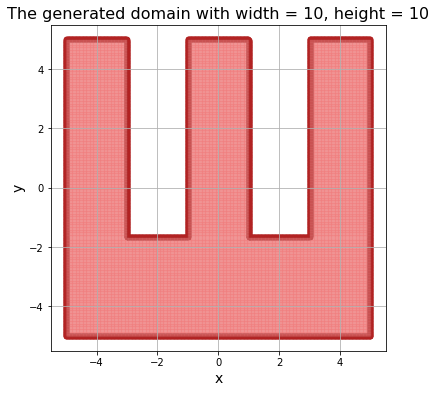

In [8]:
# Setting the width and height

w = 10
h = 10

# Setting the division point - the relative height of the full rectangle

devision_point = 1/3

# Generating the circumference of the domain 

x_y_coord = rect_circ2(w, h, devision_point)
x_coordinates = x_y_coord[0]
y_coordinates = x_y_coord[1]
x_filled = x_y_coord[2]
y_filled = x_y_coord[3]

# Plotting the domain

savefig = False

rect_plot(x_coordinates, y_coordinates, x_filled, y_filled, savefig)